In [1]:
import pandas as pd
import numpy as np
import watermark
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
warnings.filterwarnings('ignore')


In [102]:
%reload_ext watermark
%watermark -a "Guilherme"
%watermark --iversions

Author: Guilherme

numpy     : 1.26.4
seaborn   : 0.13.2
pandas    : 2.2.2
matplotlib: 3.9.2
watermark : 2.5.0
scipy     : 1.13.1



In [2]:
# importando o conjunto de dados
df = pd.read_csv('dataset.csv')

In [4]:
# Verificando uma amostra
df.head(2)

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos
0,m000,Placebo,Masculino,18,21,0,45.780350,2
1,m000,Ramicane,Masculino,24,17,5,42.728114,0


In [8]:
# Estrutura dos dados
df.shape

(500, 8)

In [9]:
# Metadados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID Mouse             500 non-null    object 
 1   Medicamento          500 non-null    object 
 2   Sexo                 500 non-null    object 
 3   Idade_Meses          500 non-null    int64  
 4   Peso (g)             500 non-null    int64  
 5   Timepoint            500 non-null    int64  
 6   Tumor Volume (mm3)   500 non-null    float64
 7   Sitios Metastáticos  500 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 31.4+ KB


In [14]:
# Resumo estatistico melhor entendimento dos dados 
df.describe()

,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,12.410000,19.946000,10.00000,40.045767,1.522000
std,7.018862,6.032899,7.07815,4.484127,1.031331
min,1.000000,10.000000,0.00000,30.007422,0.000000
25%,7.000000,15.000000,5.00000,36.565220,1.000000
50%,12.000000,20.000000,10.00000,40.237864,2.000000
75%,19.000000,26.000000,15.00000,43.319573,2.000000
max,24.000000,30.000000,20.00000,49.760029,3.000000


In [15]:
# Estatisticas das colunas categóricas
df.describe(include='object')

,ID Mouse,Medicamento,Sexo
count,500,500,500
unique,100,4,2
top,m000,Ramicane,Masculino
freq,5,133,255


In [4]:
#df.sort_values(by=['ID Mouse','Timepoint']).head(20)

In [19]:
# Verificando o volume do tumor agrupado por medicamento
df_agrupado= df.groupby('Medicamento')['Tumor Volume (mm3)'].aggregate(['mean','median','std','var','sem'])
df_agrupado

,mean,median,std,var,sem
Medicamento,,,,,
Capomulin,39.952874,40.162141,4.414222,19.485353,0.396409
Infubinol,39.527638,39.598429,4.723018,22.306899,0.436643
Placebo,40.204385,40.072851,4.735790,22.427712,0.421898
Ramicane,40.437902,40.682981,4.072941,16.588849,0.353169


In [7]:
# Criando uma coluna de faixa etária
bins = [0,6,12,18,24,30]
labels = ['0-6 meses','6-12 meses','12-18 meses','18-24 meses','24 meses ou mais']
df['Faixa_etaria'] = pd.cut(x= df['Idade_Meses'],bins=bins,labels=labels,right=False)

In [8]:
# Verificando o resultadoi
df['Faixa_etaria'].value_counts()

Faixa_etaria
6-12 meses          138
18-24 meses         124
12-18 meses         114
0-6 meses           102
24 meses ou mais     22
Name: count, dtype: int64

In [9]:
df.head(2)

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos,Faixa_etaria
0,m000,Placebo,Masculino,18,21,0,45.780350,2,18-24 meses
1,m000,Ramicane,Masculino,24,17,5,42.728114,0,24 meses ou mais


<Axes: >

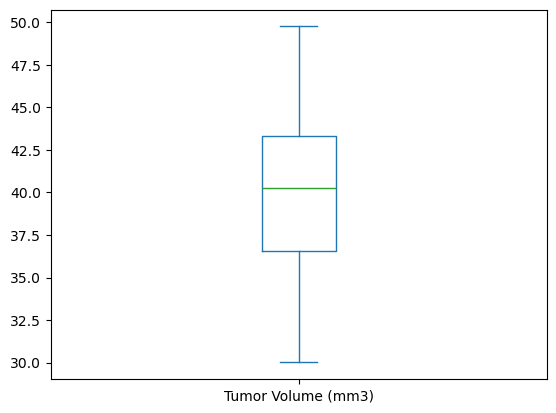

In [10]:
df['Tumor Volume (mm3)'].plot(kind='box')

### Verificando se há outliers no tamanho do tumor para cada medicamento no último ponto do tempo

In [4]:
# Descobrindo o último timepoint por idmouse
ultimo_timepoint = pd.DataFrame(df.groupby('ID Mouse')['Timepoint'].max().sort_values()).reset_index()\
                      .rename(columns={'Timepoint':'Max_Timepoint'})

# Incluiindo o último timepoint na tabela original
merge_df = pd.merge(df,ultimo_timepoint,on= "ID Mouse")
merge_df.shape
    

(500, 9)

In [5]:
# Verificando resultado
merge_df.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos,Max_Timepoint
0,m000,Placebo,Masculino,18,21,0,45.780350,2,20
1,m000,Ramicane,Masculino,24,17,5,42.728114,0,20
2,m000,Ramicane,Feminino,19,23,10,40.827502,1,20
3,m000,Capomulin,Feminino,21,23,15,38.578206,2,20
4,m000,Infubinol,Masculino,12,17,20,35.094393,2,20


In [8]:
# Listas auxiliares
tumor_volume = []
Lista_medicamentos = ['Capomulin','Ramicane','Infubinol','Placebo']

In [12]:
print("Relatório estatistíco para verificação de outliers por medicamento:\n")

for medicamento in Lista_medicamentos:

    df_filtrado = merge_df.loc[merge_df["Medicamento"] == medicamento]

    final_volume = df_filtrado.loc[df_filtrado["Timepoint"] == df_filtrado["Max_Timepoint"]]

    final_volumes = final_volume["Tumor Volume (mm3)"]

    tumor_volume.append(final_volumes)

    quartis = final_volumes.quantile([0.25,0.75])
    
    primeiro_quartil = round(quartis[0.25],2)
    
    terceiro_quartil = round(quartis[0.75],2)

    iqr = round(terceiro_quartil - primeiro_quartil,2)

    limite_inferior = round(primeiro_quartil - (1.5 * iqr),2)
    
    limite_superior = round(terceiro_quartil + (1.5 * iqr),2)

    outiers = final_volumes[(final_volume["Tumor Volume (mm3)"] <= limite_inferior) | \
                             (final_volume["Tumor Volume (mm3)"] >= limite_superior)].count()
                              
    print(f"Primeiro Quartil da Medida do Tumor com {medicamento}: {primeiro_quartil}")
    print(f"Terceiro Quartil da Medida do Tumor com {medicamento}: {terceiro_quartil}")
    print(f"Intervalo Interquartil (IQR): {iqr}")
    print(f"Valores Abaixo de {limite_inferior} podem ser outliers")
    print(f"Valores Acima de {limite_superior} podem ser outliers")
    print(f"Há {outiers} outliers para o medicamento {medicamento}")

    print("\n")

Relatório estatistíco para verificação de outliers por medicamento:

Primeiro Quartil da Medida do Tumor com Capomulin: 33.05
Terceiro Quartil da Medida do Tumor com Capomulin: 37.9
Intervalo Interquartil (IQR): 4.85
Valores Abaixo de 25.78 podem ser outliers
Valores Acima de 45.18 podem ser outliers
Há 0 outliers para o medicamento Capomulin


Primeiro Quartil da Medida do Tumor com Ramicane: 33.56
Terceiro Quartil da Medida do Tumor com Ramicane: 38.57
Intervalo Interquartil (IQR): 5.01
Valores Abaixo de 26.04 podem ser outliers
Valores Acima de 46.08 podem ser outliers
Há 0 outliers para o medicamento Ramicane


Primeiro Quartil da Medida do Tumor com Infubinol: 32.56
Terceiro Quartil da Medida do Tumor com Infubinol: 36.44
Intervalo Interquartil (IQR): 3.88
Valores Abaixo de 26.74 podem ser outliers
Valores Acima de 42.26 podem ser outliers
Há 0 outliers para o medicamento Infubinol


Primeiro Quartil da Medida do Tumor com Placebo: 32.5
Terceiro Quartil da Medida do Tumor com Plac

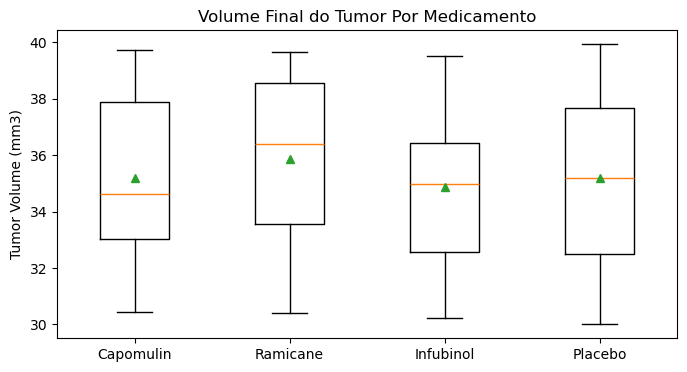

In [19]:
# Analisando outiliers através do boxplot

format = dict(marker = "o")
plt.figure(figsize=(8,4))
plt.boxplot(tumor_volume, flierprops = format, showmeans = True)
plt.title("Volume Final do Tumor Por Medicamento")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Placebo"])
plt.show()

### Pergunta 2 - Com o Uso de Medicamentos Há Efeito no Volume do Tumor ao Longo do Tempo?

In [22]:
# Extrai os dados de uma cobaia
tratamento_mouse = df.loc[df["ID Mouse"] == "m000"]

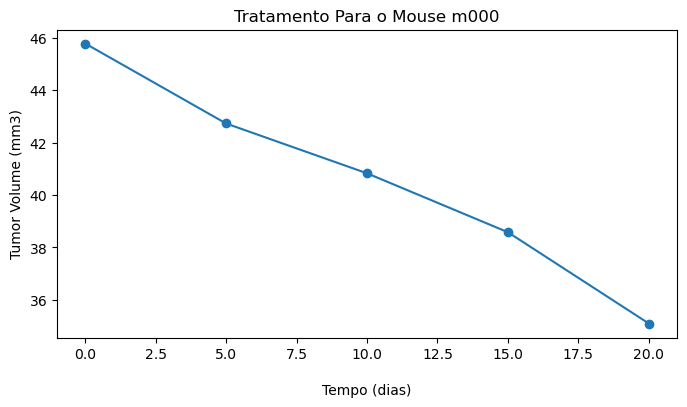

In [24]:
plt.figure(figsize=(8,4))
plt.plot(tratamento_mouse['Timepoint'], tratamento_mouse["Tumor Volume (mm3)"], marker = "o")
plt.xlabel("\nTempo (dias)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tratamento Para o Mouse m000")
plt.show()

In [ ]:
# Verificandpo a média para cada ponto no tempo, a fim de verificar o comportamento geral

In [27]:
media_tumor_longo_tempo = df.groupby("Timepoint")["Tumor Volume (mm3)"].mean()

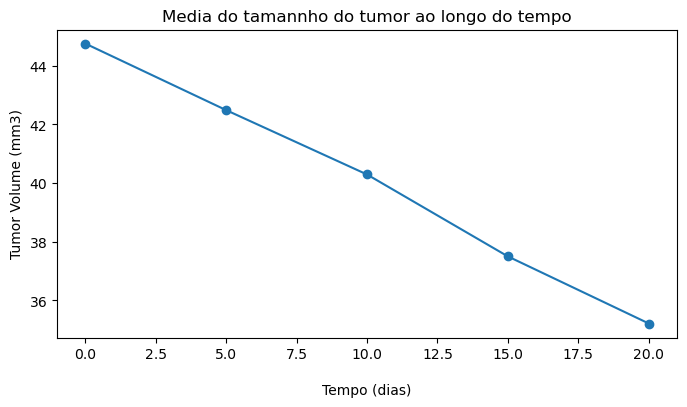

In [36]:
plt.figure(figsize=(8,4))
media_tumor_longo_tempo.plot(kind = 'line',marker = "o")
plt.xlabel("\nTempo (dias)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Media do tamannho do tumor ao longo do tempo")
plt.show()

Conclusão: Sim, ao longo do tempo o uso de medicamento surti efeito!!!

### 3- Qual a relação entre peso da cobaia e tamanho do tumor?

In [38]:
df.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos
0,m000,Placebo,Masculino,18,21,0,45.780350,2
1,m000,Ramicane,Masculino,24,17,5,42.728114,0
2,m000,Ramicane,Feminino,19,23,10,40.827502,1
3,m000,Capomulin,Feminino,21,23,15,38.578206,2
4,m000,Infubinol,Masculino,12,17,20,35.094393,2


In [44]:
# Filtrando apenas o medicamento Capomulin
df_Capomulin = df.loc[df['Medicamento'] == 'Capomulin']

In [66]:
# Calculando as médias
df_medias =  df_Capomulin.groupby('ID Mouse')[['Peso (g)','Tumor Volume (mm3)']].mean()


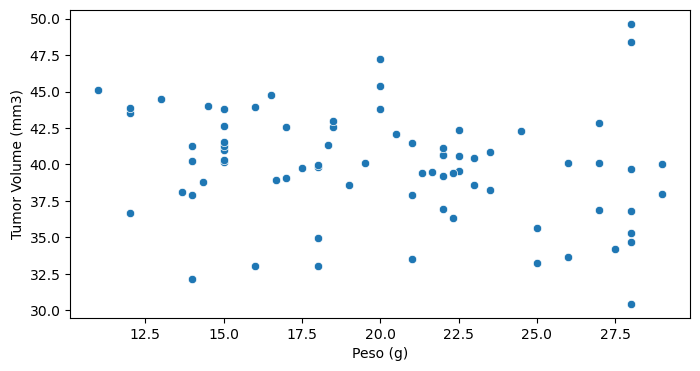

In [67]:
# Aplciando o scaterplot para verificar a correlação
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_medias,x='Peso (g)',y='Tumor Volume (mm3)')
plt.show()

In [74]:
# Calculando a correlação de person entre Peso e Tamanho do Tumor
correlation_model =  st.pearsonr(df_medias['Peso (g)'],df_medias['Tumor Volume (mm3)'])
print(f' A correlação entre as duas variáveis é:',round(correlation_model[0],2))

 A correlação entre as duas variáveis é: -0.22


Conclusão: há uma relação negativa fraca, ou seja se diminuir o tamanho do tumor o peso aumenta.

### Quantificando e prevendo a relaçaõ através de Regressão Linear

In [79]:
# Cria o modelo de regressão
modelo = st.linregress(x=df_medias['Peso (g)'],y=df_medias['Tumor Volume (mm3)'])


In [80]:
modelo.intercept

43.1616906149073

In [81]:
modelo.slope

-0.16303360099718336

In [93]:
# Montando a formula de regressão lineaer
### y = B0 +B1x
modelo_final = modelo.intercept + modelo.slope * df_medias['Peso (g)']


In [94]:
# Calcula a linha de regressão
linha_regressao = f"y={round(modelo.slope,2)}x + {round(modelo.intercept,2)}"

In [95]:
linha_regressao

'y=-0.16x + 43.16'

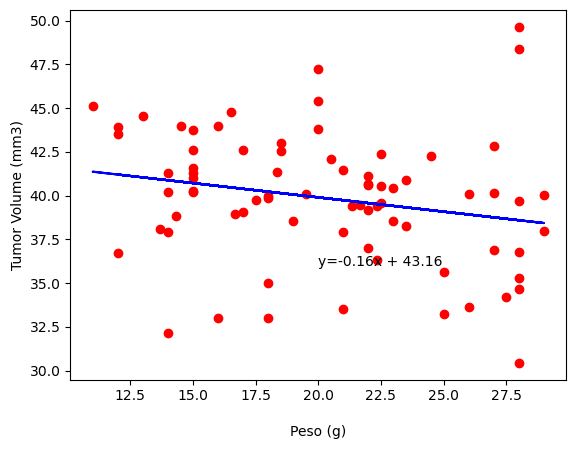

In [98]:
plt.scatter(df_medias["Peso (g)"], df_medias["Tumor Volume (mm3)"], color = "r")
plt.plot(df_medias["Peso (g)"], modelo_final, color = "blue")
plt.xlabel("\nPeso (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title=("Peso(g) Vs Tumor Volume(mm3) Para Capomulin")
plt.annotate(linha_regressao, (20,36))
plt.show()

Conclusão: Com a formula da regressão conseguiremos prever o tamanho do tumor de acordo com o peso da cobaia!

In [103]:
%watermark -a "Guilherme José Silva"
%watermark --iversions

Author: Guilherme José Silva

numpy     : 1.26.4
seaborn   : 0.13.2
pandas    : 2.2.2
matplotlib: 3.9.2
watermark : 2.5.0
scipy     : 1.13.1

